# Task №1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# ---------------------------------------------------------------------------------------------
 # ----------------------------------- OLS --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед для OLS :  (12.869249170854513, 0.00492806499923038, 5.314422220935657, 0.003142486008955383)
Тест на Гетероск для OLS (White):  (29.0349890470176, 0.00031264588067829604, 7.0977458203901795, 7.507035098091686e-06) 

abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     14.95
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.30e-07
Time:              

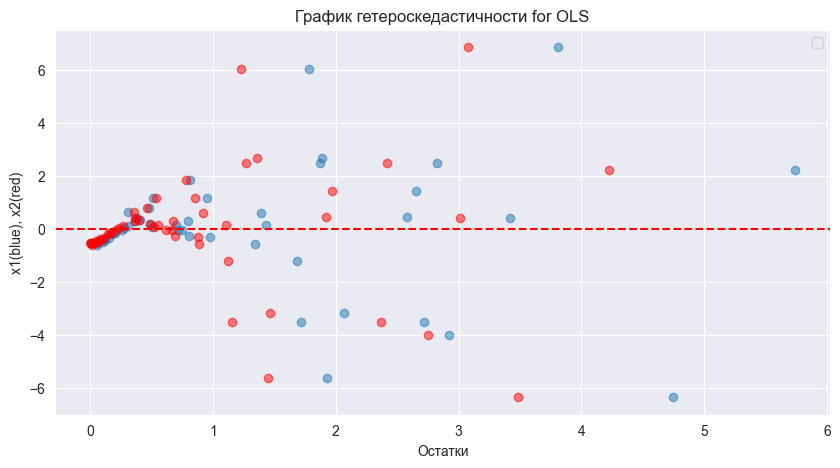

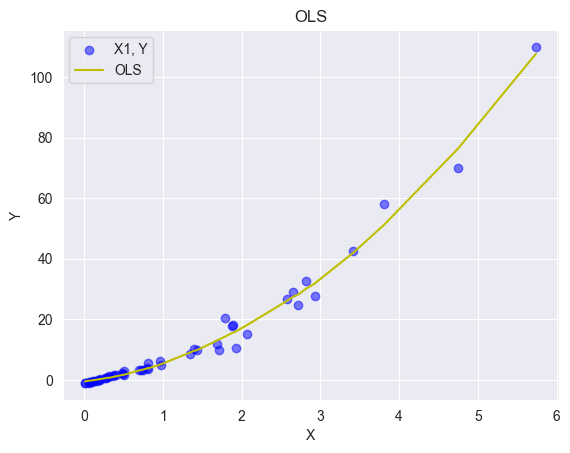

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# ---------------------------------------------------------------------------------------------
 # ----------------------------------- WLS --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед для WLS :  (10.925062466573399, 0.012138069922997161, 4.287086174972283, 0.009479178425077266)
Тест на Гетероск для WLS (White):  (23.087393827113782, 0.003253836167470408, 4.396560206910229, 0.0006729278598126464) 

abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     11.20
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.22e-05
Time:              

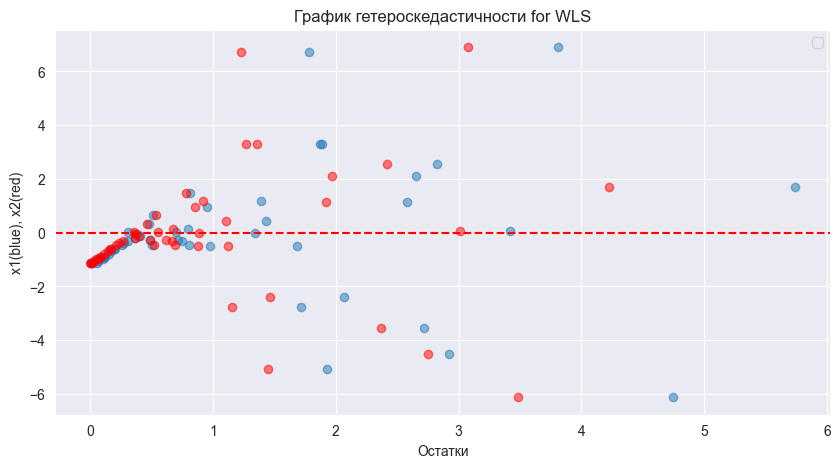

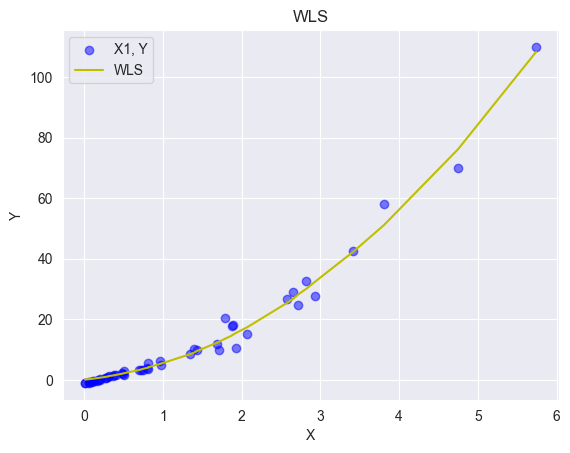

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- OLS_new --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед OLS_new :  (0.5947989209837912, 0.8976220026519538, 0.1846010120911151, 0.9063324148169011)
Тест на Гетероск для OLS_new (White):  (4.582597563131785, 0.801113727511421, 0.5171104301637793, 0.8365742801391527)
abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.3499
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.789
Time:                 

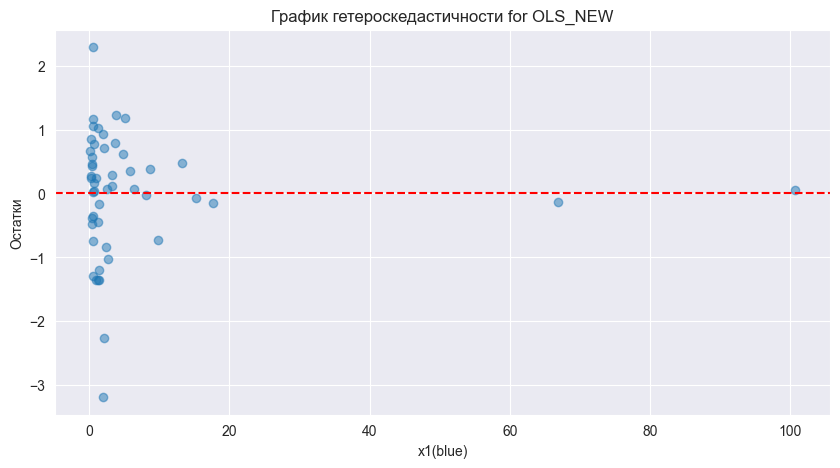

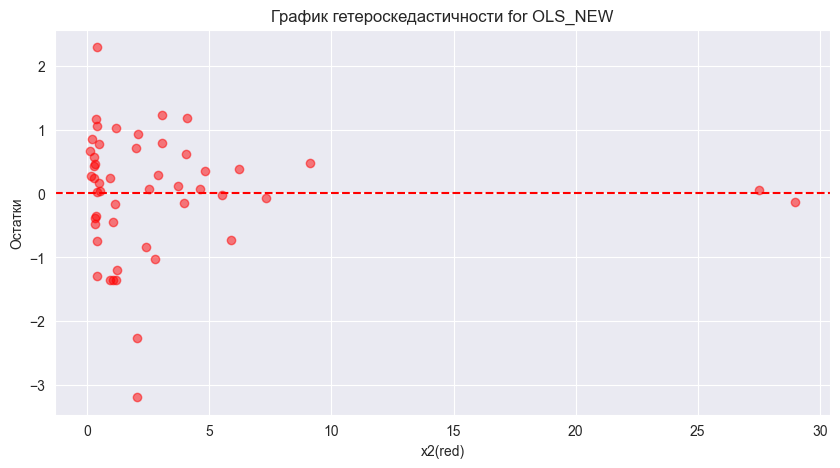

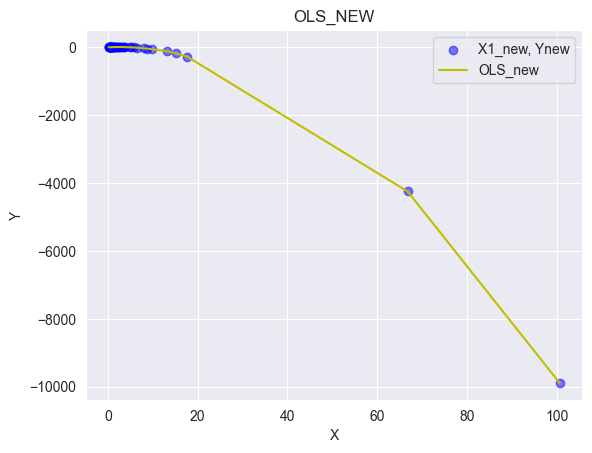

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- WLS_new --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед для WLS_new :  (40.48656923942623, 8.402408452157418e-09, 65.25448886893054, 1.3244178657885892e-16)
Тест на Гетероск для WLS_new (White):  (49.94238985474076, 4.1922684051391986e-08, 4442.876282532728, 1.0900570914023989e-57)
abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2.571
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0656
Time:

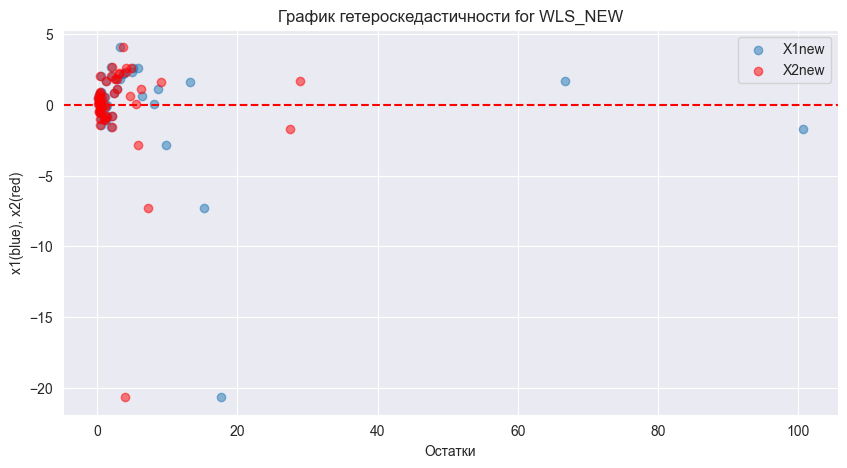

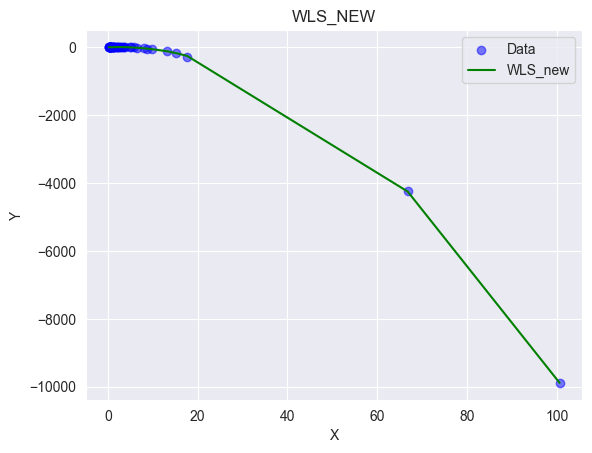

In [128]:
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv

X0 = np.ones(50)
X1 = np.random.exponential(1, 50)
X1.sort()
X2 = np.random.exponential(1, 50)
X2.sort()
X1_2 = X1**2
delta = np.random.normal(0,1,size=X1.shape)
eps =delta*X1_2

Y = - X0 + X1 +2*X1_2 + 5*X2 + eps


# ---------------------------------------------------------------------------------------------
# ----------------------------------- OLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- OLS --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")

Xmat =  sm.add_constant(np.column_stack((X0, X1, X1_2, X2)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест Бройша - Пагана на Гетероскед для OLS : ",test01)
test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02, "\n")

model2 = sm.OLS(abs(model.resid), Xmat).fit()
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")


print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model.summary())

b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model.resid, alpha=0.5)
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for OLS')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.legend()
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y, color = 'b', alpha=0.5, label='X1, Y')
plt.plot(X1, Yplt, color='y', label='OLS')
plt.title('OLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- WLS --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")

weight = abs(X1**2 + 1)
model_W = sm.WLS(Y, Xmat, weights= weight).fit()

test01 = ssa.het_breuschpagan(model_W.resid**2, Xmat)
print("Тест Бройша - Пагана на Гетероскед для WLS : ",test01)
model2 = sm.OLS(abs(model_W.resid), Xmat).fit()
test02 = ssa.het_white(model_W.resid**2, Xmat)
print("Тест на Гетероск для WLS (White): ",test02, "\n")
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")
print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model_W.summary())

b = model_W.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model_W.resid, alpha=0.5)
plt.scatter(X2, model_W.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for WLS')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.legend()
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y, color = 'b', alpha=0.5, label='X1, Y')
plt.plot(X1, Yplt, color='y', label='WLS')
plt.title('WLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# ---------------------------------------------------------------------------------------------
# ----------------------------------- OLS_new ------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- OLS_new --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")
Ynew = Y/X1_2
X1_2new = 1/X1_2
X1new = 1/X1
X2new = X2/X1_2

Xmat_new =  sm.add_constant(np.column_stack((X0, X1new, X1_2new, X2new)))
model_OLS_new = sm.OLS(Ynew, Xmat_new).fit()

test01 = ssa.het_breuschpagan(model_OLS_new.resid**2, Xmat_new)
print("Тест Бройша - Пагана на Гетероскед OLS_new : ",test01)
test02 = ssa.het_white(model_OLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для OLS_new (White): ",test02)
model2 = sm.OLS(abs(model_OLS_new.resid), Xmat).fit()
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")
print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model_OLS_new.summary())

b = model_OLS_new.params
plt.figure(figsize=(10, 5))
plt.scatter(X1new, model_OLS_new.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for OLS_NEW')
plt.ylabel('Остатки')
plt.xlabel('x1(blue)')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(X2new, model_OLS_new.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for OLS_NEW')
plt.ylabel('Остатки')
plt.xlabel('x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new , Ynew, color = 'b', alpha=0.5 , label='X1_new, Ynew')
plt.plot(X1new, Yplt, color='y', label='OLS_new')
plt.title('OLS_NEW')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS_new ------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- WLS_new --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")

weight = model_OLS_new.resid**2
model_WLS_new = sm.WLS(Ynew, Xmat_new, weights= weight).fit()
# model0 = sm.OLS(model_WLS_new.resid, X1new).fit()
# model1 = sm.OLS(model_WLS_new.resid, X1new).fit()
test01 = ssa.het_breuschpagan(model_WLS_new.resid**2, Xmat_new)
print("Тест Бройша - Пагана на Гетероскед для WLS_new : ",test01)
test02 = ssa.het_white(model_WLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для WLS_new (White): ",test02)
model2 = sm.OLS(abs(model_WLS_new.resid), Xmat).fit()
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")
print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model_WLS_new.summary())

b = model_WLS_new.params

plt.figure(figsize=(10, 5))
plt.scatter( X1new, model_WLS_new.resid, alpha=0.5, label="X1new")
plt.scatter( X2new, model_WLS_new.resid, color = 'r', alpha=0.5, label="X2new")
# plt.plot(model0.predict(X1new), model_WLS_new.resid, color='y', linestyle='--')
# plt.plot(model0.predict(X2new), model_WLS_new.resid, color='g', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for WLS_NEW')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.legend()
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new, Ynew, color = 'b', alpha=0.5, label='Data')
plt.plot(X1new, Yplt, color='g', label='WLS_new')
plt.title('WLS_NEW')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Task №2

# ---------------------------------------------------------------------------------------------
#----------------------------------- X&Y  ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Тест Бройша - Пагана на Гетероскед для OLS :  (4.591702652705687, 0.032127084253078836, 4.716433187431981, 0.032288666740759336)
Тест на Гетероск для OLS (White):  (13.658797772822261, 0.0010815080314218939, 7.672486308898752, 0.0008064499878651205) 

model.resid**2 ; Xmat = {X0, X}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.181
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0436
Time:                        16:55:06 

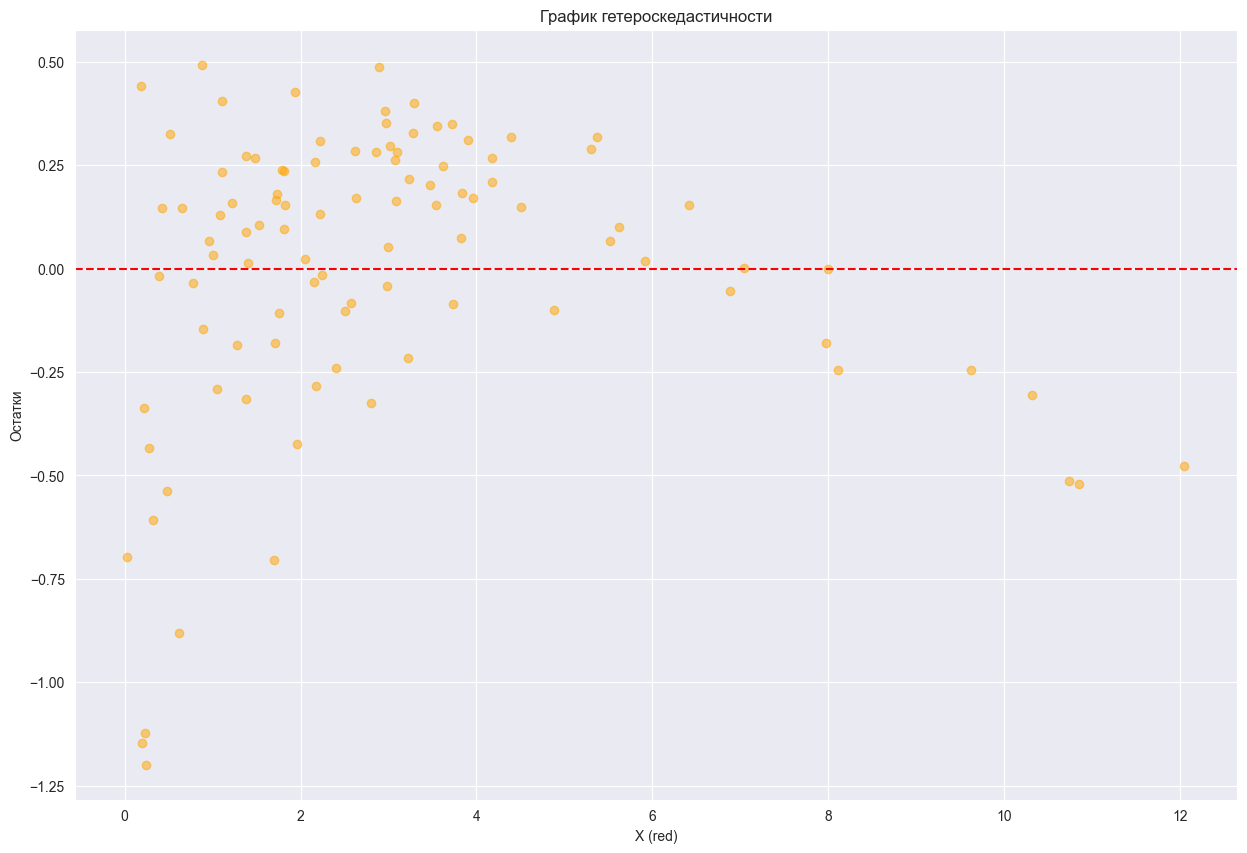

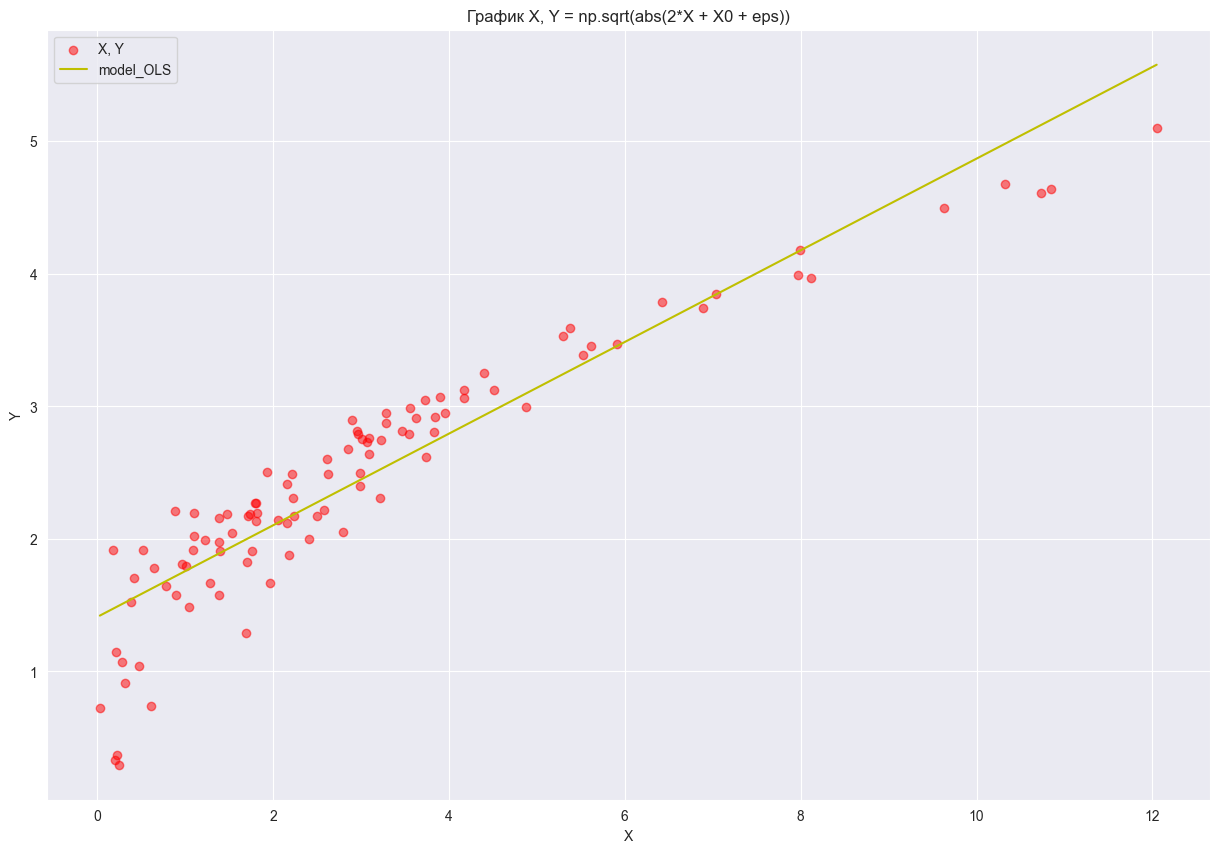

# ---------------------------------------------------------------------------------------------
#----------------------------------- X&Y BoxCox  ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Тест Бройша - Пагана на Гетероскед для OLS boxcox :  (9.079729257395996, 0.0025845831035007246, 9.786744583547014, 0.002315110872124794)
Тест на Гетероск для OLS (White) boxcox:  (14.71046316737963, 0.0006392393630344464, 8.365122969515745, 0.00044508623620283407)
model_boxcox.resid**2 ; Xmat = {X0, transformed_X}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     23.98
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.84e-06

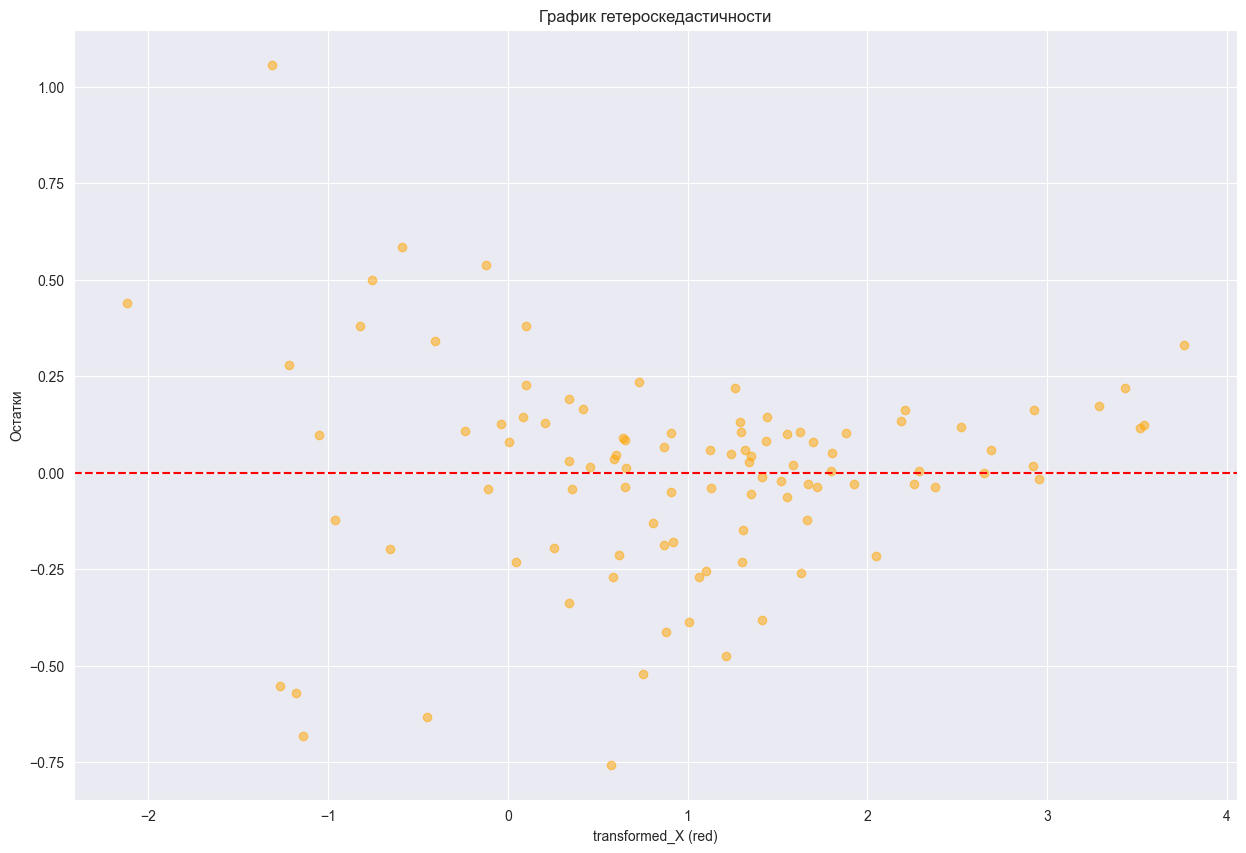

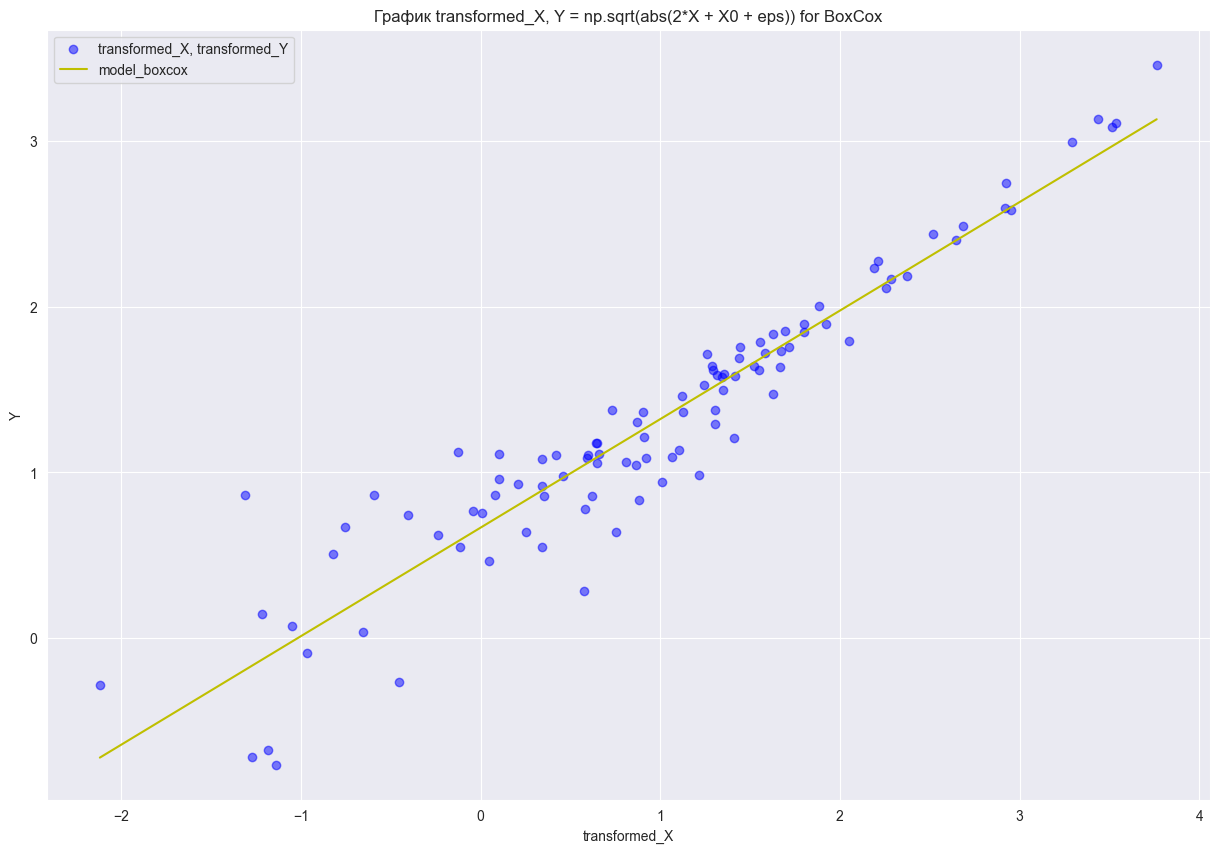

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     816.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.54e-49
Time:                        16:55:07   Log-Likelihood:                -10.938
No. Observations:                 100   AIC:                             25.88
Df Residuals:                      98   BIC:                             31.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6650      0.035     18.780      0.0

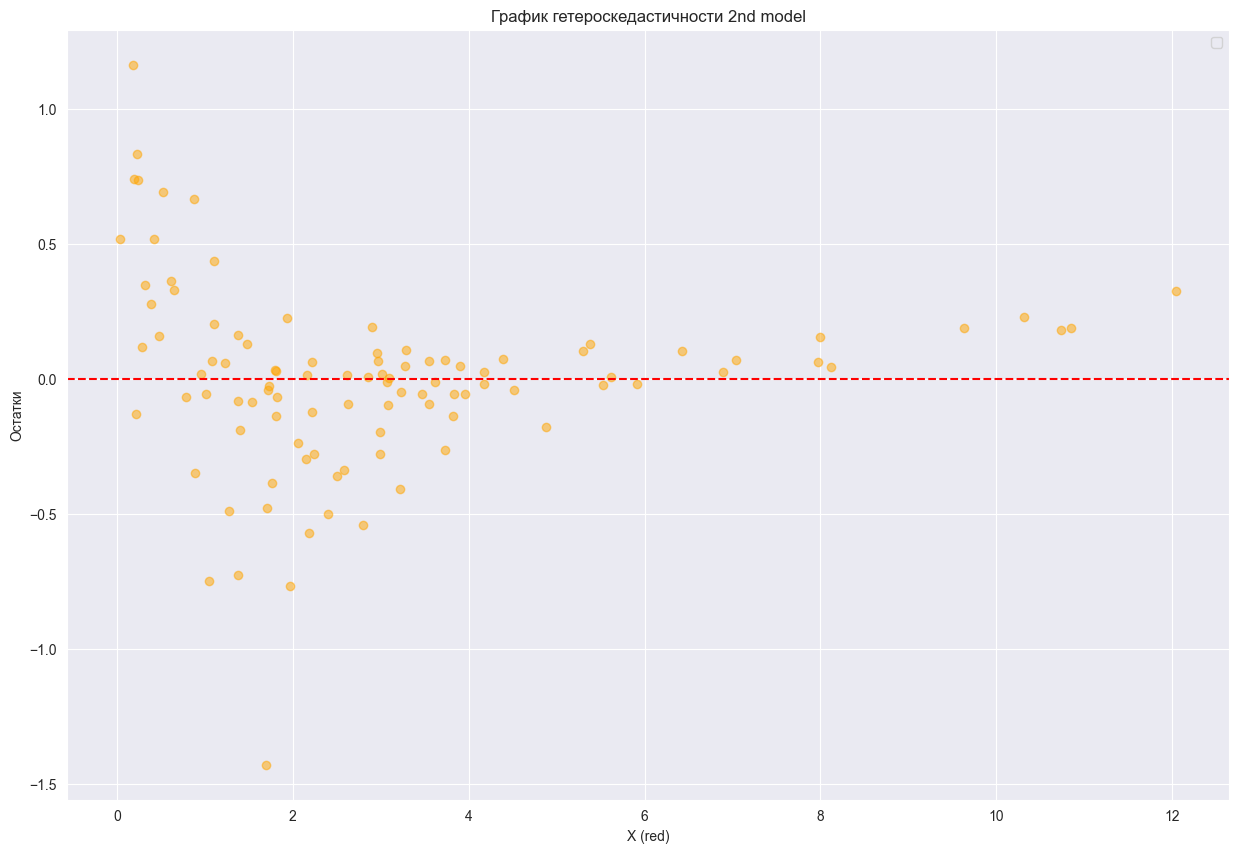

/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_93439/1055294549.py:133: RuntimeWarning: invalid value encountered in sqrt
  plt.scatter(X, np.sqrt(Y2), color = 'r', alpha=0.5, label='X2, Y2')


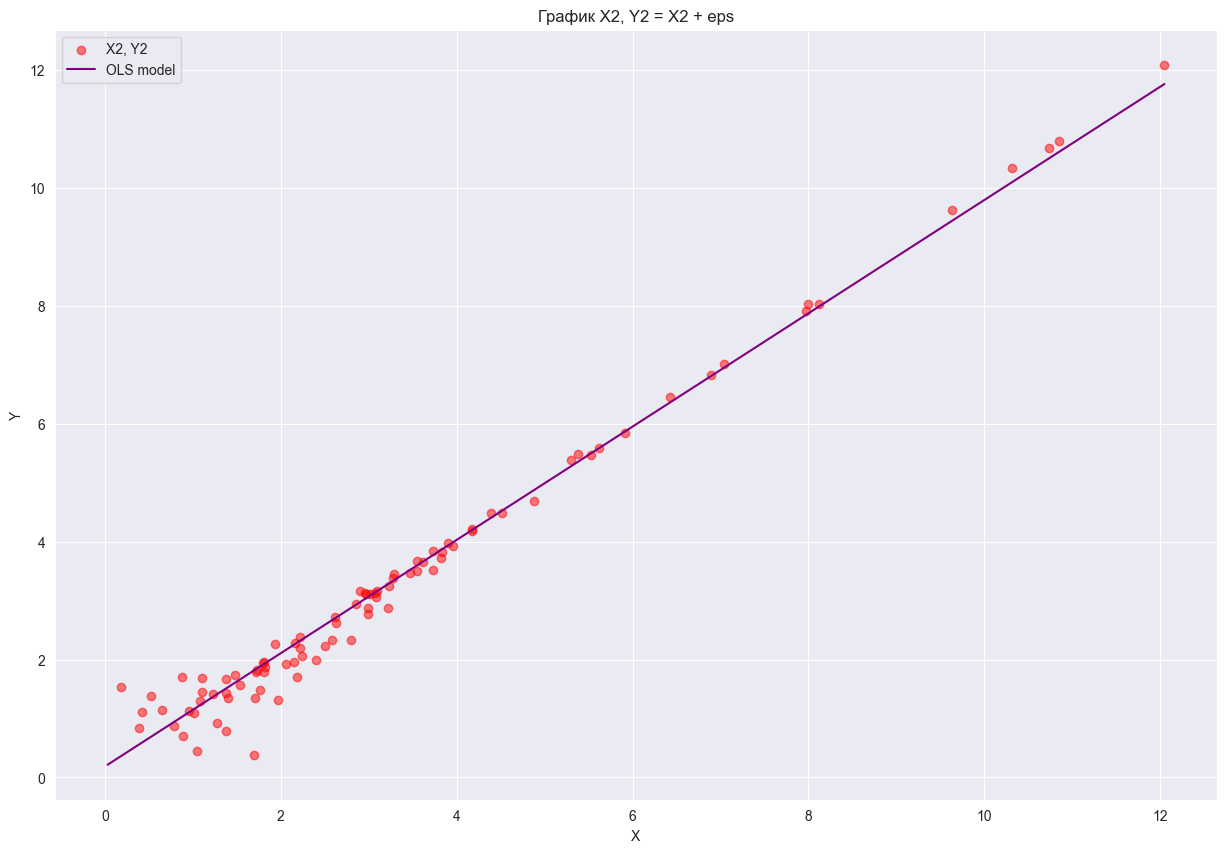

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# ---------------------------------------------------------------------------------------------
#----------------------------------- X2&Y2 BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Тест на Гетероск для OLS boxcox :  (0.6235109802681604, 0.42974556823467147, 0.6148745711286575, 0.4348495646014664)
Тест на Гетероск для OLS (White) boxcox:  (1.685297314093348, 0.4305685832805821, 0.8313804293815413, 0.43852646163428577)
model_boxcox.resid**2 ; Xmat = {X0, transformed_X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2568
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.613
Time:                 

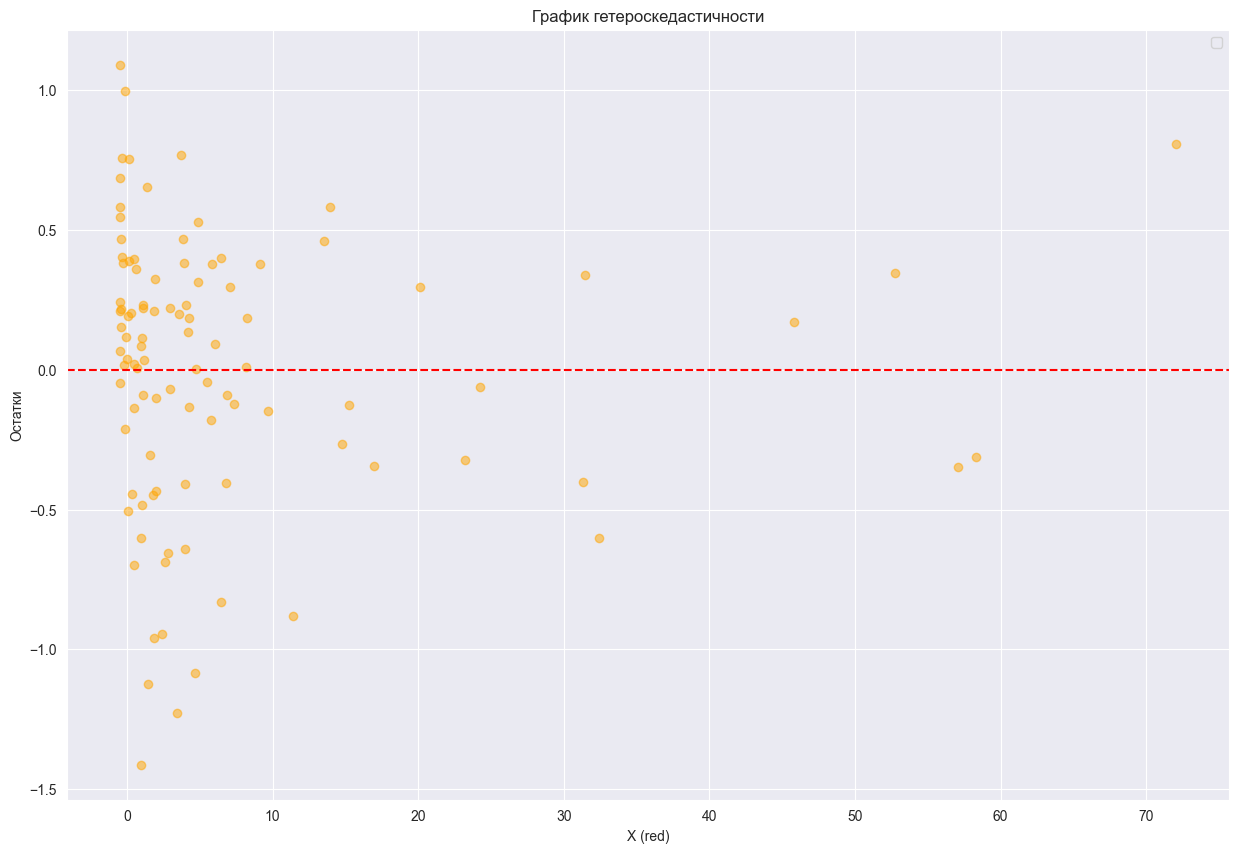

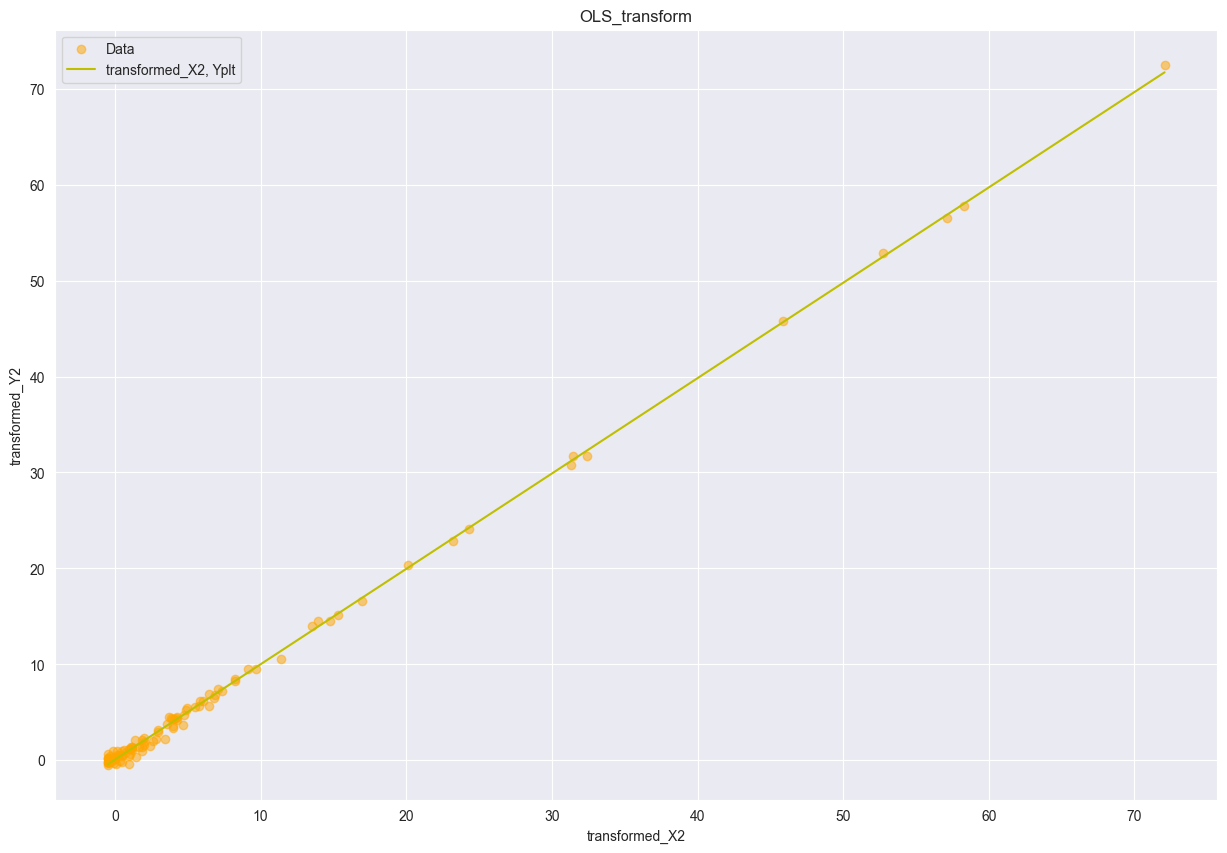

In [139]:
X0 = np.ones(100)
X = np.random.chisquare(3,100)
X.sort()
X2 = X**2
eps = np.random.normal(0,1,size=X.shape)

Y = np.sqrt(abs(2*X + X0 + eps))
Y2 = X2 + eps

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y ----------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X&Y  ----------------------------------------------\n# ---------------------------------------------------------------------------------------------\n')



Xmat =  sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест Бройша - Пагана на Гетероскед для OLS : ",test01)
test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02, "\n")

model2 = sm.OLS(model.resid**2, Xmat).fit()
print("model.resid**2 ; Xmat = {X0, X}\n", model2.summary(), "\n")
print("Y = = np.sqrt(abs(2*X + X0 + eps)) ; Xmat = {X0, X} \n",model.summary())


b = model.params
# print("Coefficients :", b)

plt.figure(figsize=(15, 10))
plt.scatter(X, model.resid,color = 'orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*X

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color = 'r', alpha=0.5,  label = "X, Y")
plt.plot(X, Yplt, color='y',  label = "model_OLS")
plt.title('График X, Y = np.sqrt(abs(2*X + X0 + eps))')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X&Y BoxCox  ----------------------------------------------\n# ---------------------------------------------------------------------------------------------\n')


transformed_Y, lambda_Y = sps.boxcox(Y)
transformed_X, lambda_X = sps.boxcox(X)
# transformed_X0, lambda_X0 = sps.boxcox(X0)
# transformed_epsilon, lambda_epsilon = sps.boxcox(eps)
Xmat =  sm.add_constant(np.column_stack((X0, transformed_X)))

model_boxcox = sm.OLS(transformed_Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model_boxcox.resid**2, Xmat)
print("Тест Бройша - Пагана на Гетероскед для OLS boxcox : ",test01)
test02 = ssa.het_white(model_boxcox.resid**2, Xmat)
print("Тест на Гетероск для OLS (White) boxcox: ",test02)

model2 = sm.OLS(model_boxcox.resid**2, Xmat).fit()
print("model_boxcox.resid**2 ; Xmat = {X0, transformed_X}\n", model2.summary(), "\n")
print("Y = = np.sqrt(abs(2*X + X0 + eps)) ; Xmat = {X0, transformed_X}\n",model_boxcox.summary())

b = model_boxcox.params
# print("Coefficients :", b)

plt.figure(figsize=(15, 10))
plt.scatter(transformed_X, model_boxcox.resid,color = 'orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('transformed_X (red)')
plt.show()
Yplt = b[0] + b[1]*transformed_X

plt.figure(figsize=(15, 10))
plt.scatter(transformed_X, transformed_Y, color = 'b', alpha=0.5, label = "transformed_X, transformed_Y")
# plt.scatter(X, Y, color = 'r', alpha=0.5, label = "X, Y")
plt.plot(transformed_X, Yplt, color='y',  label = "model_boxcox")
plt.title('График transformed_X, Y = np.sqrt(abs(2*X + X0 + eps)) for BoxCox')
plt.xlabel('transformed_X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(model_boxcox.summary())
print('Lambda for Y:', lambda_Y)
print('Lambda for X:', lambda_X)
# print('Transformed epsilon:', transformed_epsilon)
# print('Lambda epsilon', lambda_epsilon)


# ---------------------------------------------------------------------------------------------
# ----------------------------------- X2&Y2 ---------------------------------------------------
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X2&Y2  ----------------------------------------------\n# ---------------------------------------------------------------------------------------------\n')

Xmat =  sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(np.sqrt(abs(Y2)), Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)
test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

model2 = sm.OLS(model.resid**2, Xmat).fit()
print("model.resid**2 ; Xmat = {X0, X}\n", model2.summary(), "\n")
print("Y2 = X2 + eps ; Xmat = {X0, X}\n",model.summary())

b = model.params
# print("Coefficients :", b)
plt.figure(figsize=(15, 10))
plt.scatter(X, model.resid,color = 'orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности 2nd model')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.legend()
plt.show()
Yplt = b[0]+b[1]*X

plt.figure(figsize=(15, 10))
plt.scatter(X, np.sqrt(Y2), color = 'r', alpha=0.5, label='X2, Y2')
plt.plot(X, Yplt, color='purple', label='OLS model')
plt.title('График X2, Y2 = X2 + eps')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



# ---------------------------------------------------------------------------------------------
# ----------------------------------- X2&Y2 BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X2&Y2 BoxCox ----------------------------------------------\n# ---------------------------------------------------------------------------------------------\n')

transformed_Y2 = sps.boxcox(np.sqrt(abs(Y2)), lmbda=2)
transformed_X2= sps.boxcox(X, lmbda=2)
# transformed_epsilon, lambda_epsilon = sps.boxcox(eps)
Xmat =  sm.add_constant(np.column_stack((X0, transformed_X2)))

model_boxcox2 = sm.OLS(transformed_Y2, Xmat).fit()

test01 = ssa.het_breuschpagan(model_boxcox2.resid**2, Xmat)
print("Тест на Гетероск для OLS boxcox : ",test01)
test02 = ssa.het_white(model_boxcox2.resid**2, Xmat)
print("Тест на Гетероск для OLS (White) boxcox: ",test02)

model2 = sm.OLS(model_boxcox2.resid**2, Xmat).fit()
print("model_boxcox.resid**2 ; Xmat = {X0, transformed_X2}\n", model2.summary(), "\n")
print("Y2 = X2 + eps ; Xmat = {X0, transformed_X2}\n",model_boxcox2.summary())


b = model_boxcox2.params
# print("Coefficients :", b)

plt.figure(figsize=(15, 10))
plt.scatter(transformed_X2, model_boxcox2.resid,color = 'orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.legend()
plt.show()
Yplt = b[0] + b[1]*transformed_X2

plt.figure(figsize=(15, 10))
plt.scatter(transformed_X2, transformed_Y2, color = 'orange', alpha=0.5, label='Data')
plt.plot(transformed_X2, Yplt, color='y' , label='transformed_X2, Yplt')
plt.title('OLS_transform')
plt.xlabel('transformed_X2')
plt.ylabel('transformed_Y2')
plt.legend()
plt.show()

# print(model_boxcox.summary())
# print('Lambda for Y2:', lambda_Y2)
# print('Lambda for X2:', lambda_X2)
# print('Transformed epsilon:', transformed_epsilon)
# print('Lambda epsilon', lambda_epsilon)

Задача №3

In [ ]:
f = open('SLEEP75.txt')
lines = f.readlines()
f.close()



Задача №5

<Wald test (chi2): statistic=1.203952589615619, p-value=0.5477280935595608, df_denom=2>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     470.6
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.09e-43
Time:                        02:41:13   Log-Likelihood:                -58.293
No. Observations:                 124   AIC:                             120.6
Df Residuals:                     122   BIC:                             126.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

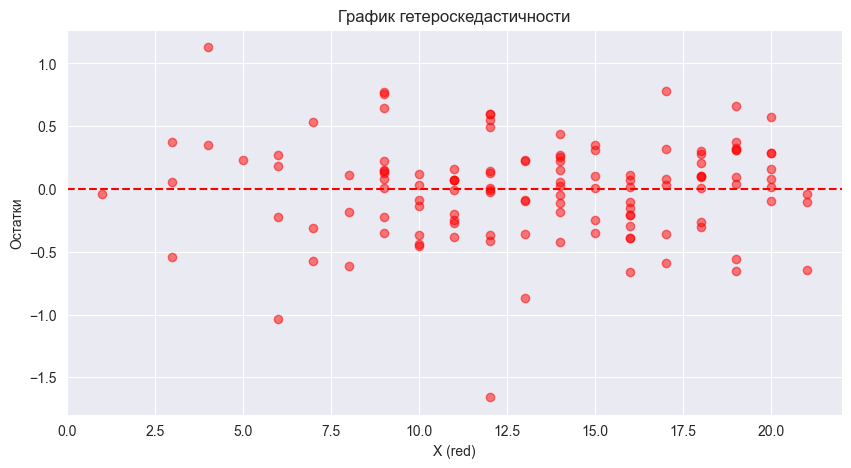

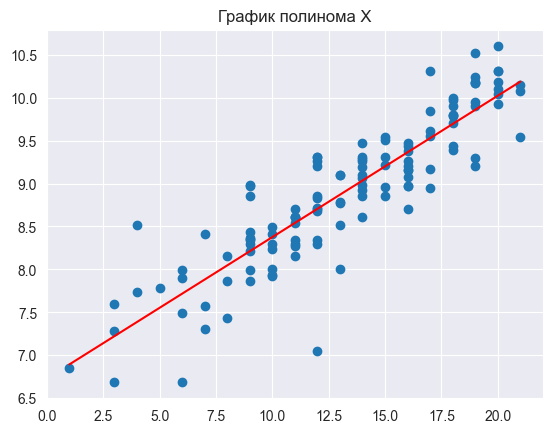

<Wald test (chi2): statistic=0.0006039252147395183, p-value=0.9803940481881176, df_denom=1>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     236.3
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.63e-42
Time:                        02:41:13   Log-Likelihood:                -57.675
No. Observations:                 124   AIC:                             121.4
Df Residuals:                     121   BIC:                             129.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

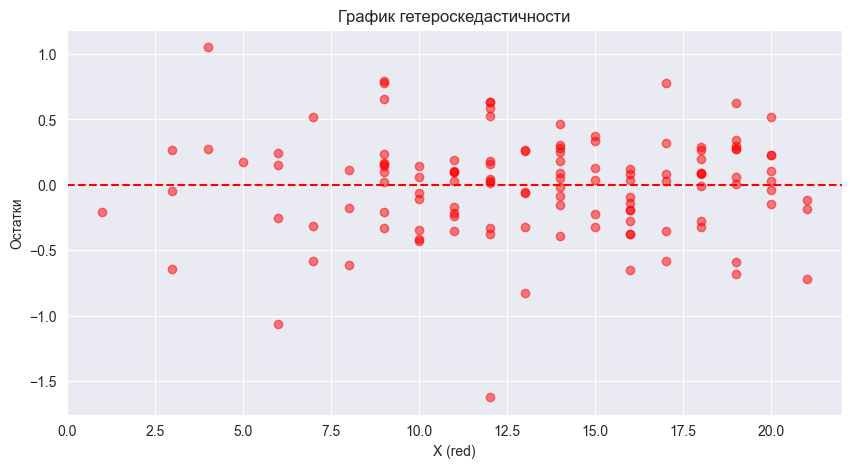

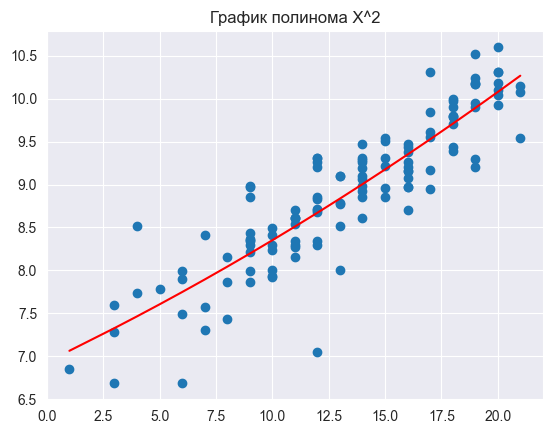

<Wald test (chi2): statistic=1.4941886135675284, p-value=0.22156770837394377, df_denom=1>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     158.4
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.49e-41
Time:                        02:41:14   Log-Likelihood:                -57.007
No. Observations:                 124   AIC:                             122.0
Df Residuals:                     120   BIC:                             133.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

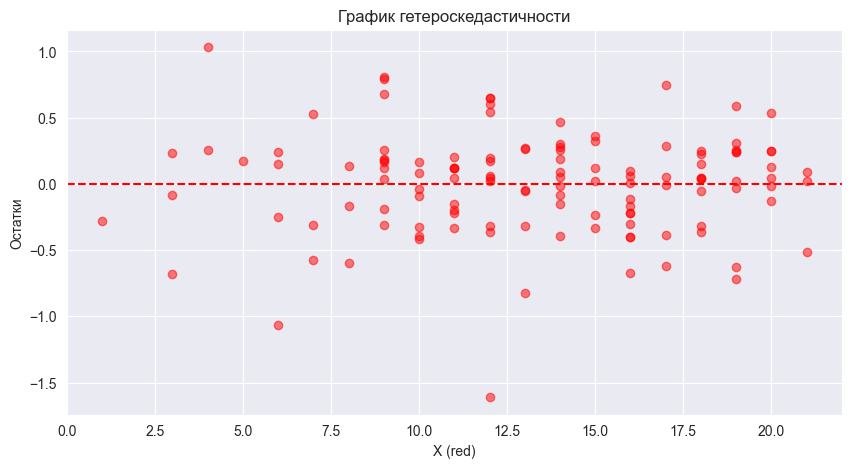

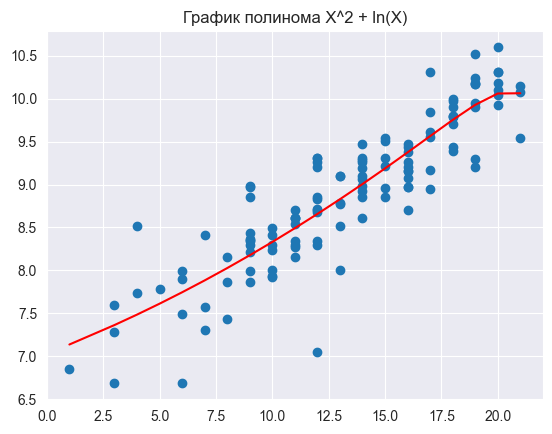

<Wald test (chi2): statistic=1.0946162894686347, p-value=0.5785049679560816, df_denom=2>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     156.2
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.83e-41
Time:                        02:41:14   Log-Likelihood:                -57.674
No. Observations:                 124   AIC:                             123.3
Df Residuals:                     120   BIC:                             134.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

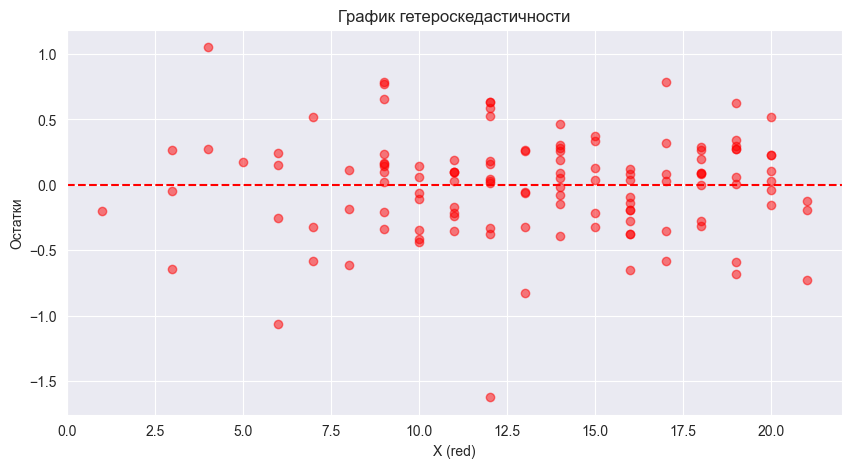

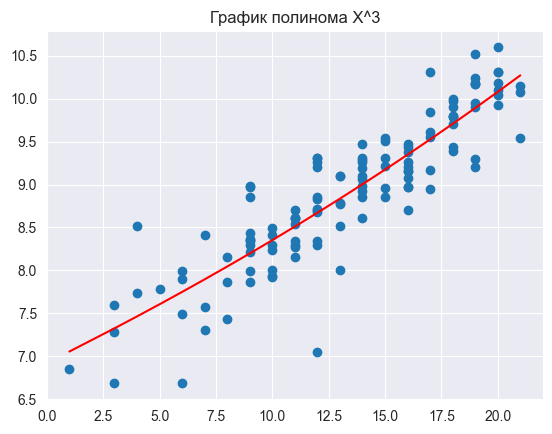

<Wald test (chi2): statistic=3.717504396733624, p-value=0.29362867244645857, df_denom=3>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     117.1
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.67e-40
Time:                        02:41:14   Log-Likelihood:                -57.287
No. Observations:                 124   AIC:                             124.6
Df Residuals:                     119   BIC:                             138.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

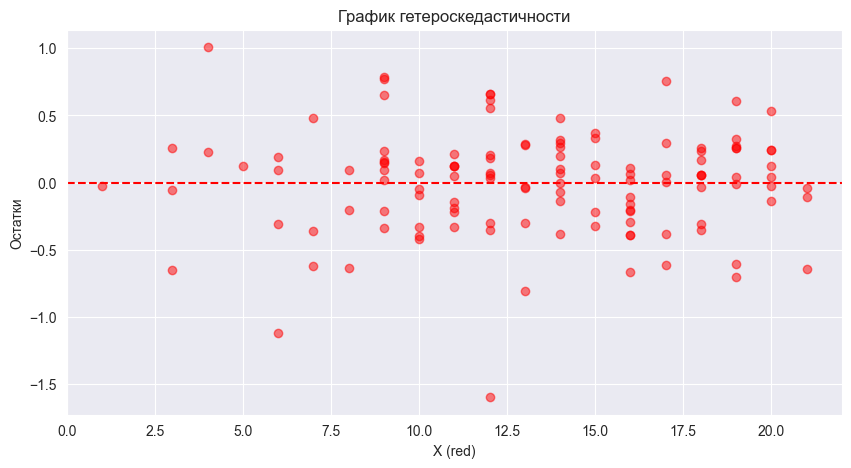

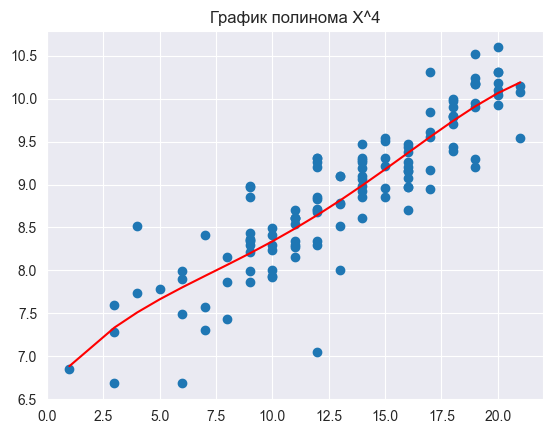

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 124 and the array at index 1 has size 100

In [145]:
import statsmodels.stats.diagnostic

f = open('mazda.txt')
lines = f.readlines()
f.close()
lines.pop(0)

year =[]
price = []
for line in lines:
    words=line.split()
    year.append(int(words[0]))
    price.append(int(words[1]))
    
# print(price)
# print(year)

temp = zip(year,price)
Ts = sorted(temp, key=lambda tup: tup[0])
years = [temp[0]-70 for temp in Ts]
prices = [temp[1] for temp in Ts]

Y = np.log(np.array(prices))
X = np.array(years)

n = len(X)
X0 = np.ones(n)

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X ----------------------------------------------
# ---------------------------------------------------------------------------------------------


Xmat = sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^2 ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2)))
model = sm.OLS(Y, Xmat).fit()

print(statsmodels.stats.diagnostic.linear_reset(model, power=2, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^2')
plt.show()

# print("fdkmvwkemf :",T.ContrastResults())

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^2 + ln(X) -------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2, np.exp(X))))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=2, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2 + b[3]*np.exp(X)

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^2 + ln(X)')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^3 ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2, X**3)))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=3, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2 + b[3]*X**3

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^3')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^4 ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2, X**3, X**4)))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=4, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2 + b[3]*X**3 + b[4]*X**4

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^4')
plt.show()

# # ---------------------------------------------------------------------------------------------
# # ----------------------------------- polynom X^4 ----------------------------------------------
# # ---------------------------------------------------------------------------------------------
# 
n = 100
X1 = np.random.uniform(-math.pi,math.pi, n)
eps_1 = np.random.normal(0,0.1, n)
Y1 = 2*X + 1 + eps_1
Xmat = sm.add_constant(np.column_stack((X0, X1, X1**2)))
model = sm.OLS(Y1, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=2, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2

plt.scatter(X, Y1)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^4')
plt.show()

In [ ]:
print("Hello!")